In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_recall_curve
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.preprocessing import MinMaxScaler


## Loading the final preprocessed trained dataset


In [2]:
#loading the train set
full_cleaned_final=pd.read_csv('full_cleaned_final.csv')
full_cleaned_final


,Unnamed: 0,scale__biofuel_electricity,scale__hydro_electricity,scale__solar_electricity,scale__wind_electricity,scale__coal_electricity,scale__fossil_electricity,scale__gas_production,scale__greenhouse_gas_emissions,scale__low_carbon_electricity,...,scale__hydro_consumption,scale__per_capita_electricity,scale__biofuel_elec_per_capita,scale__hydro_elec_per_capita,scale__solar_elec_per_capita,scale__wind_elec_per_capita,remainder__country,remainder__year,remainder__iso_code,remainder__GDP_per_capita
0,452,0.001059,0.024022,0.000030,0.000000,0.000427,0.001823,0.006140,0.001440,0.011168,...,0.026251,0.018246,0.001818,0.019452,0.000236,0.000000,Colombia,2000,COL,4003.840324
1,1277,0.011710,0.000106,0.000030,0.001266,0.004548,0.014668,0.065683,0.010902,0.002413,...,0.000121,0.098410,0.049571,0.000212,0.000581,0.016213,Netherlands,2000,NLD,40456.942237
2,1120,0.000000,0.000000,0.000000,0.000000,0.000000,0.005402,0.009762,0.003224,0.000000,...,0.000000,0.276118,0.000000,0.000000,0.000000,0.000000,Kuwait,2000,KWT,31657.763247
3,339,0.002765,0.018302,0.000000,0.000183,0.001026,0.001897,0.006717,0.001693,0.009629,...,0.020815,0.174031,0.048283,0.150747,0.000000,0.009667,New Zealand,2000,NZL,30863.457123
4,1275,0.000000,0.004403,0.000000,0.000000,0.001832,0.006847,0.054513,0.004868,0.002035,...,0.005008,0.030635,0.000000,0.005610,0.000000,0.000000,Uzbekistan,2000,UZB,1276.760315
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1361,497,0.001706,0.002413,0.001345,0.000015,0.000601,0.000667,0.000000,0.000682,0.003329,...,0.000000,0.109652,0.054181,0.036154,0.191878,0.001465,Slovenia,2022,SVN,23231.243427
1362,540,0.003825,0.000340,0.001315,0.002425,0.000000,0.000187,0.000000,0.000175,0.001091,...,0.000000,0.026013,0.093610,0.003931,0.144544,0.179564,Lithuania,2022,LTU,16606.769394
1363,951,0.031248,0.001536,0.007676,0.000991,0.006924,0.007756,0.000000,0.007654,0.014507,...,0.000000,0.142279,0.200403,0.004648,0.221110,0.019237,Czechia,2022,CZE,19402.359402
1364,1352,0.040134,0.014224,0.100214,0.094341,0.001427,0.018873,0.000000,0.013405,0.062471,...,0.000000,0.104868,0.056794,0.009497,0.636974,0.403901,Spain,2022,ESP,26748.793053


## Loading the test set

In [3]:
#Loading the test set
full_cleaned_final_test = pd.read_csv('full_cleaned_final_test.csv').sort_values('remainder__year', ascending=True)
full_cleaned_final_test

,Unnamed: 0,scale__biofuel_electricity,scale__hydro_electricity,scale__solar_electricity,scale__wind_electricity,scale__coal_electricity,scale__fossil_electricity,scale__gas_production,scale__greenhouse_gas_emissions,scale__low_carbon_electricity,...,scale__hydro_consumption,scale__per_capita_electricity,scale__biofuel_elec_per_capita,scale__hydro_elec_per_capita,scale__solar_elec_per_capita,scale__wind_elec_per_capita,remainder__country,remainder__year,remainder__iso_code,remainder__GDP_per_capita
127,127,0.023185,0.003851,0.000000,0.001449,0.022466,0.049669,0.121450,0.039170,0.033230,...,0.004332,0.111445,0.026516,0.002078,0.000000,0.005014,United Kingdom,2000,GBR,39187.583082
277,277,0.000000,0.001150,0.000000,0.000000,0.000000,0.002868,0.005516,0.002079,0.000531,...,0.001307,0.037273,0.000000,0.004459,0.000000,0.000000,Azerbaijan,2000,AZE,1480.756662
327,327,0.000000,0.000023,0.000000,0.000000,0.000000,0.004358,0.000231,0.002600,0.000010,...,0.000023,0.041464,0.000000,0.000070,0.000000,0.000000,Belarus,2000,BLR,2616.912993
32,32,0.003354,0.005289,0.000000,0.000000,0.000757,0.011186,0.053181,0.007161,0.002643,...,0.005958,0.053429,0.009839,0.007319,0.000000,0.000000,Malaysia,2000,MYS,6461.980319
228,228,0.000000,0.005697,0.000000,0.000000,0.000000,0.000501,0.000202,0.000466,0.002633,...,0.006484,0.013730,0.000000,0.014328,0.000000,0.000000,Ecuador,2000,ECU,4227.552516
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258,258,0.010415,0.000015,0.001070,0.001113,0.000000,0.000768,0.000000,0.000749,0.001003,...,0.000023,0.094689,0.527589,0.000362,0.243509,0.170631,Estonia,2021,EST,21707.240751
220,220,0.000235,0.000915,0.005565,0.007794,0.004473,0.005889,0.000000,0.005459,0.002860,...,0.000617,0.018917,0.000427,0.000784,0.045378,0.042804,Morocco,2021,MAR,3290.620361
4,4,0.006473,0.005394,0.000458,0.003142,0.000273,0.000816,0.000000,0.000691,0.003682,...,0.005392,0.064939,0.107301,0.042191,0.034153,0.157576,Croatia,2021,HRV,15166.413288
218,218,0.001588,0.003563,0.001376,0.000015,0.000721,0.000789,0.000000,0.000805,0.003899,...,0.003548,0.128975,0.050454,0.053392,0.196278,0.001465,Slovenia,2021,SVN,24744.841297


In [4]:
full_cleaned_final.columns

Index(['Unnamed: 0', 'scale__biofuel_electricity', 'scale__hydro_electricity',
       'scale__solar_electricity', 'scale__wind_electricity',
       'scale__coal_electricity', 'scale__fossil_electricity',
       'scale__gas_production', 'scale__greenhouse_gas_emissions',
       'scale__low_carbon_electricity', 'scale__net_elec_imports',
       'scale__nuclear_electricity', 'scale__oil_production',
       'scale__primary_energy_consumption', 'scale__hydro_consumption',
       'scale__per_capita_electricity', 'scale__biofuel_elec_per_capita',
       'scale__hydro_elec_per_capita', 'scale__solar_elec_per_capita',
       'scale__wind_elec_per_capita', 'remainder__country', 'remainder__year',
       'remainder__iso_code', 'remainder__GDP_per_capita'],
      dtype='object')

## Best features


In [5]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier

In [6]:
X = full_cleaned_final.iloc[:,0:20]  #independent columns
y = full_cleaned_final.iloc[:,-1]


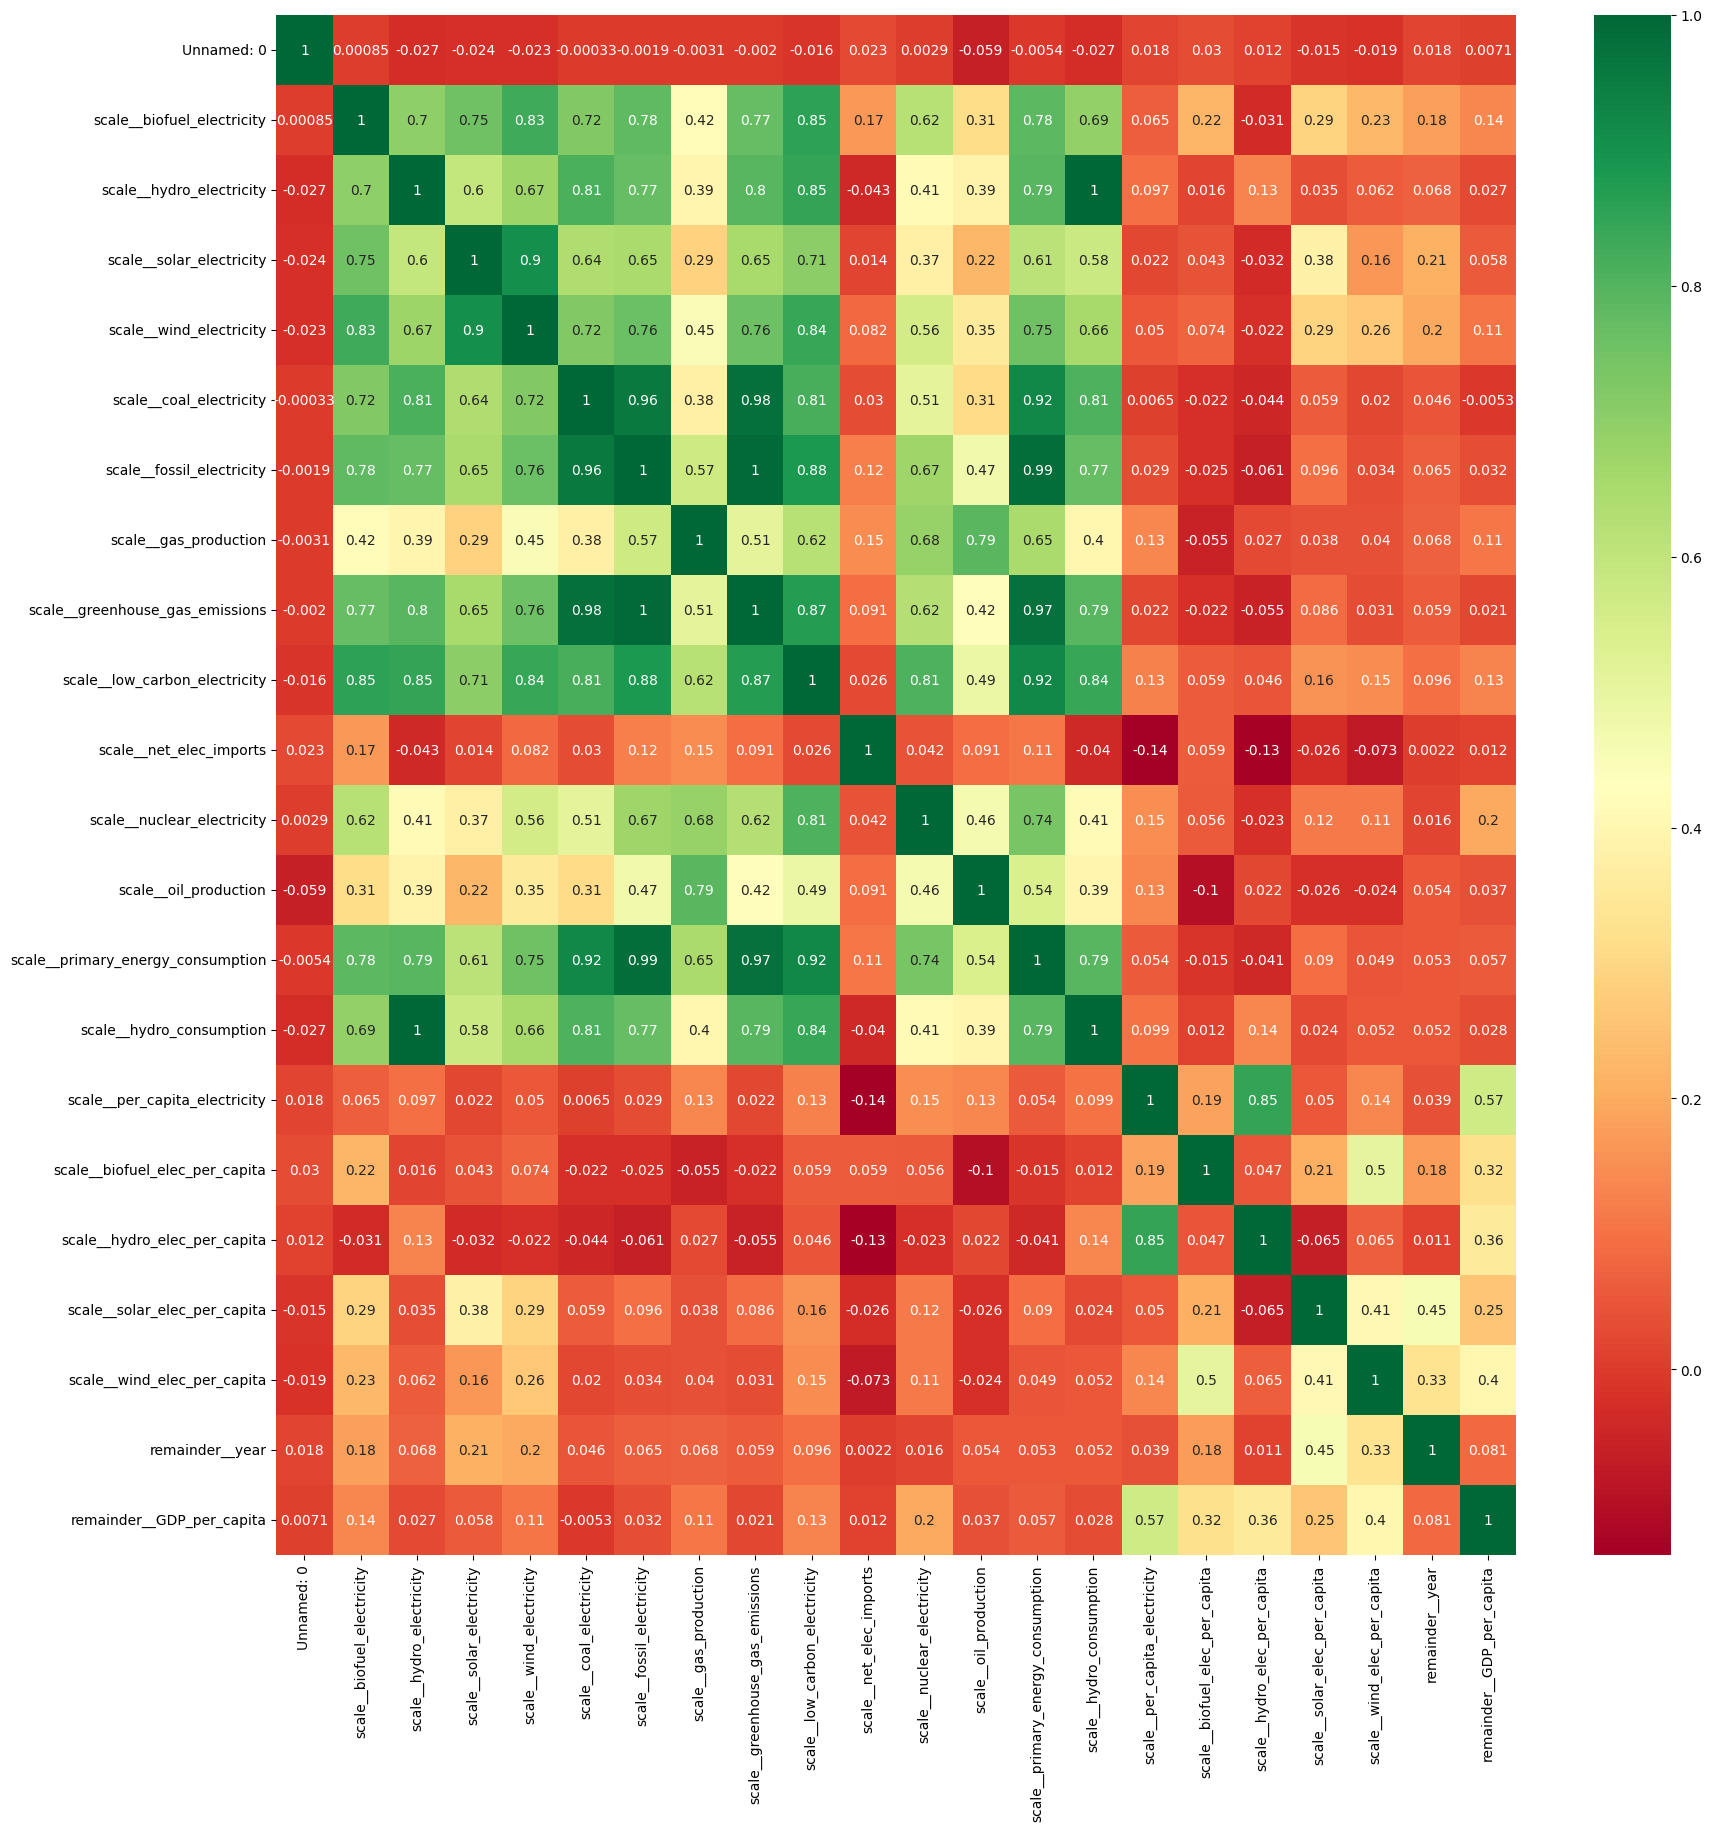

In [7]:
corrmat = full_cleaned_final.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(full_cleaned_final[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [8]:
full_cleaned_final1 = full_cleaned_final.drop(columns=['Unnamed: 0','remainder__iso_code','remainder__year','remainder__country'])

In [9]:
full_cleaned_final1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 20 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   scale__biofuel_electricity         1366 non-null   float64
 1   scale__hydro_electricity           1366 non-null   float64
 2   scale__solar_electricity           1366 non-null   float64
 3   scale__wind_electricity            1366 non-null   float64
 4   scale__coal_electricity            1366 non-null   float64
 5   scale__fossil_electricity          1366 non-null   float64
 6   scale__gas_production              1366 non-null   float64
 7   scale__greenhouse_gas_emissions    1366 non-null   float64
 8   scale__low_carbon_electricity      1366 non-null   float64
 9   scale__net_elec_imports            1366 non-null   float64
 10  scale__nuclear_electricity         1366 non-null   float64
 11  scale__oil_production              1366 non-null   float

In [10]:
full_cleaned_final1['remainder__GDP_per_capita']

0        4003.840324
1       40456.942237
2       31657.763247
3       30863.457123
4        1276.760315
            ...     
1361    23231.243427
1362    16606.769394
1363    19402.359402
1364    26748.793053
1365    45227.961978
Name: remainder__GDP_per_capita, Length: 1366, dtype: float64

## Statistical inference

### Impact of Biofuel in GDP_Per_capita

In [11]:
model1 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__biofuel_electricity', data=full_cleaned_final1).fit()

print(model1.params)

Intercept                     21562.954640
scale__biofuel_electricity    41595.643059
dtype: float64


In [12]:
# Checking the R-sqaured
model1.rsquared

0.018831799780587466

In [13]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     remainder__GDP_per_capita   R-squared:                       0.019
Model:                                   OLS   Adj. R-squared:                  0.018
Method:                        Least Squares   F-statistic:                     26.18
Date:                       Fri, 09 Jun 2023   Prob (F-statistic):           3.55e-07
Time:                               10:25:08   Log-Likelihood:                -15575.
No. Observations:                       1366   AIC:                         3.115e+04
Df Residuals:                           1364   BIC:                         3.117e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
==============================================================================================
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                   2.156e+04    626.438     34.422      0.000    2.03e+04    2.28e+04
scale__biofuel_electricity   4.16e+04   8129.549      5.117      0.000    2.56e+04    5.75e+04
==============================================================================
Omnibus:                      301.576   Durbin-Watson:                   1.873
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              579.722
Skew:                           1.311   Prob(JB):                    1.30e-126
Kurtosis:                       4.820   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Impact of biofuel_elec_per_capita on GDP

In [14]:
model_bio = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__biofuel_elec_per_capita', data=full_cleaned_final1).fit()

print(model_bio.params)
model_bio.rsquared

Intercept                         19535.575924
scale__biofuel_elec_per_capita    60750.342318
dtype: float64


0.10349115218288674

### Impact of Oil_production in GDP_Per_capita

In [15]:
model_oil = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__oil_production', data=full_cleaned_final1).fit()

print(model_oil.params)
model_oil.rsquared

Intercept                22339.860297
scale__oil_production     5880.201583
dtype: float64


0.001352971483876586

###  Net imports

In [16]:
model_elec_imports = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__net_elec_imports', data=full_cleaned_final1).fit()

print(model_elec_imports.params)
model_elec_imports.rsquared


Intercept                  21263.839773
scale__net_elec_imports     2763.673058
dtype: float64


0.0001470837498085409

### Fossil

In [17]:
scale__fossil_electricity = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__fossil_electricity', data=full_cleaned_final1).fit()

print(scale__fossil_electricity.params)
scale__fossil_electricity.rsquared

Intercept                    22454.170018
scale__fossil_electricity     7804.193196
dtype: float64


0.001048297911811824

### Gas production

In [18]:
scale__gas_production = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__gas_production', data=full_cleaned_final1).fit()

print(scale__gas_production.params)
scale__gas_production.rsquared


Intercept                21797.935132
scale__gas_production    21935.554946
dtype: float64


0.012439032518112292

### Impact of hydro_electricity on GDP

In [19]:
model2 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__hydro_electricity', data=full_cleaned_final).fit()

print(model2.params)

Intercept                   22486.776947
scale__hydro_electricity     6986.252677
dtype: float64


In [20]:
model2.rsquared

0.000718126216884607

In [21]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     remainder__GDP_per_capita   R-squared:                       0.001
Model:                                   OLS   Adj. R-squared:                 -0.000
Method:                        Least Squares   F-statistic:                    0.9802
Date:                       Fri, 09 Jun 2023   Prob (F-statistic):              0.322
Time:                               10:25:08   Log-Likelihood:                -15588.
No. Observations:                       1366   AIC:                         3.118e+04
Df Residuals:                           1364   BIC:                         3.119e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2.249e+04    626.254     35.907      0.000    2.13e+04    2.37e+04
scale__hydro_electricity  6986.2527   7056.360      0.990      0.322   -6856.242    2.08e+04
==============================================================================
Omnibus:                      274.302   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              479.602
Skew:                           1.260   Prob(JB):                    7.17e-105
Kurtosis:                       4.439   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Impact of hydro_elec_per_capita on GDP

In [22]:
model__hydro_elec_per_capita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__hydro_elec_per_capita', data=full_cleaned_final1).fit()

print(model__hydro_elec_per_capita.params)
model__hydro_elec_per_capita.rsquared

Intercept                       20276.569464
scale__hydro_elec_per_capita    61582.142514
dtype: float64


0.1262457719105058

### Impact of Solar_electricity on GDP

In [23]:
model3 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__solar_electricity', data=full_cleaned_final).fit()

print(model3.params)
model3.rsquared
model3.summary()

Intercept                   22457.614867
scale__solar_electricity    24389.229025
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     remainder__GDP_per_capita   R-squared:                       0.003
Model:                                   OLS   Adj. R-squared:                  0.003
Method:                        Least Squares   F-statistic:                     4.578
Date:                       Fri, 09 Jun 2023   Prob (F-statistic):             0.0326
Time:                               10:25:08   Log-Likelihood:                -15586.
No. Observations:                       1366   AIC:                         3.118e+04
Df Residuals:                           1364   BIC:                         3.119e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                 2.246e+04    600.934     37.371      0.000    2.13e+04    2.36e+04
scale__solar_electricity  2.439e+04   1.14e+04      2.140      0.033    2027.551    4.68e+04
==============================================================================
Omnibus:                      277.690   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              490.831
Skew:                           1.267   Prob(JB):                    2.61e-107
Kurtosis:                       4.484   Cond. No.                         19.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Impact of solar_elec_per_capita on GDP

In [24]:
model_solar_per_capita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__solar_elec_per_capita', data=full_cleaned_final).fit()

print(model_solar_per_capita.params)
model_solar_per_capita.rsquared
model_solar_per_capita.summary()

Intercept                       20441.493311
scale__solar_elec_per_capita    52345.684610
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     remainder__GDP_per_capita   R-squared:                       0.065
Model:                                   OLS   Adj. R-squared:                  0.064
Method:                        Least Squares   F-statistic:                     94.07
Date:                       Fri, 09 Jun 2023   Prob (F-statistic):           1.48e-21
Time:                               10:25:08   Log-Likelihood:                -15543.
No. Observations:                       1366   AIC:                         3.109e+04
Df Residuals:                           1364   BIC:                         3.110e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                     2.044e+04    617.781     33.089      0.000    1.92e+04    2.17e+04
scale__solar_elec_per_capita  5.235e+04   5396.909      9.699      0.000    4.18e+04    6.29e+04
==============================================================================
Omnibus:                      307.557   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              571.892
Skew:                           1.368   Prob(JB):                    6.54e-125
Kurtosis:                       4.600   Cond. No.                         9.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Impact of Wind_electricity on GDP

In [25]:
model4 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__wind_electricity', data=full_cleaned_final).fit()

print(model4.params)

Intercept                  22171.215487
scale__wind_electricity    41123.247096
dtype: float64


In [26]:
model4.rsquared

0.01127844318611304

In [27]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                               
=====================================================================================
Dep. Variable:     remainder__GDP_per_capita   R-squared:                       0.011
Model:                                   OLS   Adj. R-squared:                  0.011
Method:                        Least Squares   F-statistic:                     15.56
Date:                       Fri, 09 Jun 2023   Prob (F-statistic):           8.40e-05
Time:                               10:25:08   Log-Likelihood:                -15581.
No. Observations:                       1366   AIC:                         3.117e+04
Df Residuals:                           1364   BIC:                         3.118e+04
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                2.217e+04    603.210     36.755      0.000     2.1e+04    2.34e+04
scale__wind_electricity  4.112e+04   1.04e+04      3.945      0.000    2.07e+04    6.16e+04
==============================================================================
Omnibus:                      283.288   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              514.436
Skew:                           1.270   Prob(JB):                    1.96e-112
Kurtosis:                       4.608   Cond. No.                         17.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Impact of wind_elec_per_capita on GDP

In [28]:
model_wind_per_capita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__wind_elec_per_capita', data=full_cleaned_final).fit()
print(model_wind_per_capita.params)
model_wind_per_capita.rsquared

Intercept                      18903.845130
scale__wind_elec_per_capita    71387.872999
dtype: float64


0.15744956880905692

### Impact of biofuel and wind_electricity on GDP

In [29]:
model5 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__biofuel_electricity + scale__wind_electricity', data=full_cleaned_final).fit()

print(model5.params)
model5.rsquared

Intercept                     21515.309983
scale__biofuel_electricity    47797.504015
scale__wind_electricity       -9547.537993
dtype: float64


0.01902109529144358

### Impact of per_capita_electricity on GDP

In [30]:
model_perCapita = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__per_capita_electricity', data=full_cleaned_final).fit()

print(model_perCapita.params)
model_perCapita.rsquared

Intercept                         11656.900619
scale__per_capita_electricity    101277.232796
dtype: float64


0.3230973865979381

## Training an OLS model

In [31]:
X_train = full_cleaned_final[['scale__net_elec_imports','scale__primary_energy_consumption','scale__per_capita_electricity','scale__biofuel_elec_per_capita','scale__hydro_elec_per_capita','scale__solar_elec_per_capita','scale__wind_elec_per_capita']]
y_train = full_cleaned_final[['remainder__GDP_per_capita']]

X_test = full_cleaned_final_test[['scale__net_elec_imports','scale__primary_energy_consumption','scale__per_capita_electricity','scale__biofuel_elec_per_capita','scale__hydro_elec_per_capita','scale__solar_elec_per_capita','scale__wind_elec_per_capita']]
y_test = full_cleaned_final_test[['remainder__GDP_per_capita']]
#'scale__biofuel_electricity','scale__hydro_electricity','scale__solar_electricity','scale__wind_electricity',

In [32]:
print(X_train.shape)
np.linalg.matrix_rank(X_train)

(1366, 7)


7

In [33]:
model = sm.OLS(y_train,X_train).fit()

In [34]:
# Your predictions
y_pred = model.predict(X_test)

In [35]:
y_pred=pd.DataFrame(y_pred)
y_pred

,0
127,23476.239767
277,11249.265260
327,12698.903377
32,13382.047009
228,7141.056855
...,...
258,34966.772897
220,11538.372159
4,21835.957983
218,25159.921539


In [36]:
y_test


,remainder__GDP_per_capita
127,39187.583082
277,1480.756662
327,2616.912993
32,6461.980319
228,4227.552516
...,...
258,21707.240751
220,3290.620361
4,15166.413288
218,24744.841297


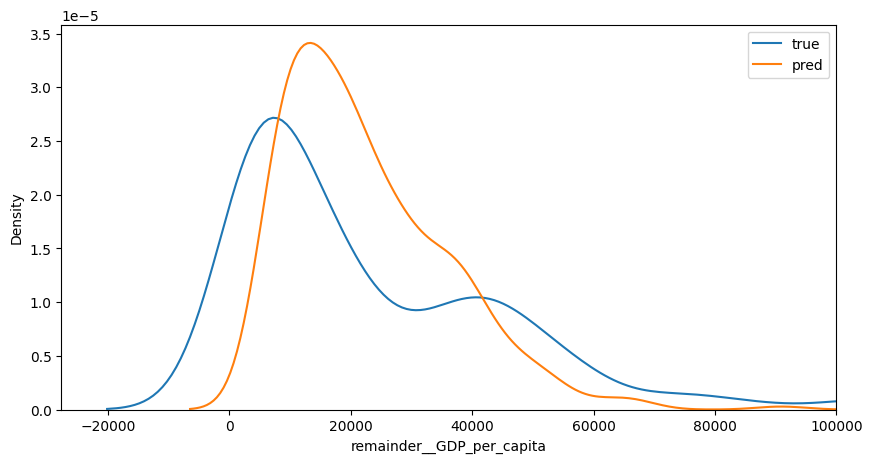

In [37]:
plt.figure(figsize = (10,5))
sns.kdeplot(y_test['remainder__GDP_per_capita'], label = 'true')
sns.kdeplot(y_pred[0], label = 'pred')
plt.xlim(xmax=10e4)
plt.legend()

## Train with a linear regression model

In [38]:
model = LinearRegression()

# Train the model on the data
model.fit(X_train, y_train)

LinearRegression()

In [39]:
model.score(X_test,y_test)

0.4429585796275073

In [40]:
from sklearn.preprocessing import PolynomialFeatures
Poly_model = PolynomialFeatures(degree=3)
X_poly = Poly_model.fit_transform(X_train)
model = LinearRegression()
model.fit(X_poly,y_train)


LinearRegression()

In [41]:
y_pred = model.predict(X_poly)

In [42]:
from sklearn.metrics import r2_score
r2_score_train=r2_score(y_train,y_pred)
r2_score_train

0.7712908209208797

In [43]:
X_test_poly = Poly_model.fit_transform(X_test)

In [44]:
y_test_pred = model.predict(X_test_poly)
r2_score_test =r2_score(y_test,y_test_pred)
r2_score_test

0.7087577362613225

In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [46]:
vif = pd.DataFrame()
vif["variables"] = X_train.columns
vif["VIF"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]

# Print the VIF scores
print(vif)

                           variables       VIF
0            scale__net_elec_imports  2.393023
1  scale__primary_energy_consumption  1.200199
2      scale__per_capita_electricity  6.835990
3     scale__biofuel_elec_per_capita  1.719724
4       scale__hydro_elec_per_capita  4.271087
5       scale__solar_elec_per_capita  1.443440
6        scale__wind_elec_per_capita  1.835339


## Same process with the base model

In [47]:
full_cleaned_base=pd.read_csv('full_cleaned_final.csv')

In [48]:
modelb1 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__biofuel_electricity', data=full_cleaned_base).fit()

print(modelb1.params)

Intercept                     21562.954640
scale__biofuel_electricity    41595.643059
dtype: float64


In [49]:
modelb2 = smf.ols(formula = 'remainder__GDP_per_capita ~ scale__hydro_electricity', data=full_cleaned_base).fit()

print(modelb2.params)

Intercept                   22486.776947
scale__hydro_electricity     6986.252677
dtype: float64
